In [1]:
import gzip
import math
import random
from collections import defaultdict
import json
import ast
from collections import Counter
from operator import itemgetter
import numpy as np

import matplotlib.pyplot as plt

In [5]:
fr=open("australian_users_items.json",encoding = 'utf8')
fw=open("australian_users_items_double_quotes.json", "w")

for line in fr:
    json_dat = json.dumps(ast.literal_eval(line))
    dict_dat = json.loads(json_dat)
    json.dump(dict_dat, fw)
    fw.write("\n")

fw.close()
fr.close()

FileNotFoundError: [Errno 2] No such file or directory: 'australian_users_items.json'

In [3]:
# path = "australian_users_items.json.gz"
# f = gzip.open(path, 'rt', encoding="utf8")
user_list = []
f = open('australian_users_items_double_quotes.json', encoding="utf8")
for line in f:
       
    cur_json = json.loads(line)
    user_list.append(cur_json)
# json = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'australian_users_items_double_quotes.json'

In [4]:
len(user_list)

0

In [29]:
game_list = []
game_id_list = []
playtime_list = []
for i in user_list:
    all_items = i['items']
    for item in all_items:
        game_list.append(item['item_name'])
        game_id_list.append(item['item_id'])
        playtime_list.append(item['playtime_forever'])
    

In [33]:
id_to_name = dict(zip(set(game_id_list),set(game_list)))

In [45]:
game_count = Counter(game_list)
game_count

Counter({'Counter-Strike': 9735,
         'Team Fortress Classic': 6334,
         'Day of Defeat': 3465,
         'Deathmatch Classic': 3274,
         'Half-Life: Opposing Force': 6289,
         'Ricochet': 3309,
         'Half-Life': 7750,
         'Half-Life: Blue Shift': 6206,
         'Day of Defeat: Source': 4978,
         'Counter-Strike: Source': 24220,
         'Psychonauts': 3853,
         'Call of Duty 2': 780,
         "Sid Meier's Civilization IV": 6378,
         "Sid Meier's Pirates!": 2335,
         'Joint Task Force': 105,
         'Deus Ex: Game of the Year Edition': 3530,
         'BioShock': 10272,
         'BioShock Remastered': 10272,
         'Half-Life 2': 18307,
         'Half-Life 2: Deathmatch': 15854,
         'Half-Life 2: Lost Coast': 19826,
         'Half-Life Deathmatch: Source': 13327,
         'Half-Life 2: Episode One': 13275,
         'Portal': 18774,
         'Half-Life 2: Episode Two': 13060,
         'Company of Heroes: Opposing Fronts': 6355,
     

In [58]:
sorted_game = sorted(game_count.items(),key=itemgetter(1),reverse = True)

In [60]:
ten_most_owned_games = sorted_game[:10]
ten_most_owned_games

[('Dota 2 Test', 49571),
 ('Counter-Strike: Global Offensive', 43776),
 ("Garry's Mod", 43301),
 ('Unturned', 38682),
 ('Left 4 Dead 2', 37044),
 ('Left 4 Dead 2 Beta', 37044),
 ('Terraria', 29239),
 ('Warframe', 25807),
 ('Portal 2', 24465),
 ('Counter-Strike: Source', 24220)]

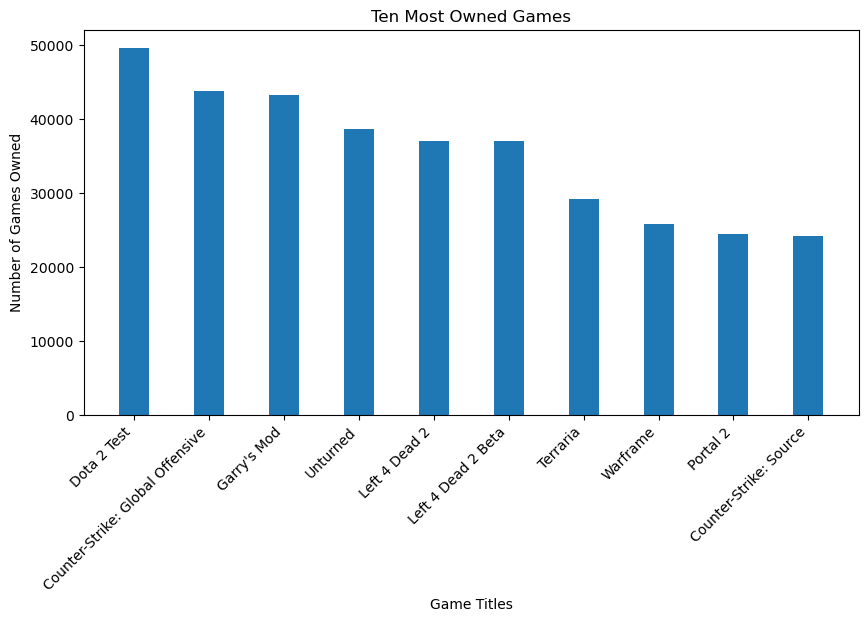

In [83]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar([i[0] for i in ten_most_owned_games], [i[1] for i in ten_most_owned_games],
        width = 0.4)
 
plt.xlabel("Game Titles")
plt.ylabel("Number of Games Owned")
plt.title("Ten Most Owned Games")
plt.xticks(rotation = 45,horizontalalignment="right")
plt.show()

In [89]:
playtime_list.sort(reverse = True)


In [97]:
len(playtime_list)

5153209

In [99]:
playtime_list[70000:]

[13760,
 13760,
 13760,
 13760,
 13760,
 13760,
 13759,
 13758,
 13758,
 13758,
 13758,
 13758,
 13758,
 13758,
 13757,
 13757,
 13757,
 13757,
 13757,
 13757,
 13757,
 13756,
 13756,
 13756,
 13756,
 13755,
 13755,
 13755,
 13754,
 13754,
 13754,
 13753,
 13753,
 13753,
 13753,
 13753,
 13752,
 13752,
 13752,
 13752,
 13751,
 13751,
 13751,
 13751,
 13751,
 13750,
 13749,
 13749,
 13749,
 13749,
 13749,
 13748,
 13748,
 13748,
 13748,
 13748,
 13748,
 13748,
 13747,
 13747,
 13747,
 13747,
 13747,
 13747,
 13746,
 13746,
 13745,
 13745,
 13745,
 13745,
 13745,
 13745,
 13744,
 13744,
 13744,
 13744,
 13744,
 13743,
 13743,
 13742,
 13742,
 13742,
 13742,
 13742,
 13742,
 13741,
 13741,
 13741,
 13741,
 13741,
 13741,
 13741,
 13740,
 13740,
 13740,
 13740,
 13740,
 13740,
 13739,
 13739,
 13738,
 13738,
 13738,
 13738,
 13738,
 13738,
 13738,
 13737,
 13737,
 13737,
 13737,
 13736,
 13735,
 13735,
 13735,
 13734,
 13734,
 13734,
 13734,
 13734,
 13733,
 13733,
 13733,
 13733,
 13733,


In [111]:
zero_to_one_hundred_hours = [i for i in playtime_list if i >=0 and i <= 100]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


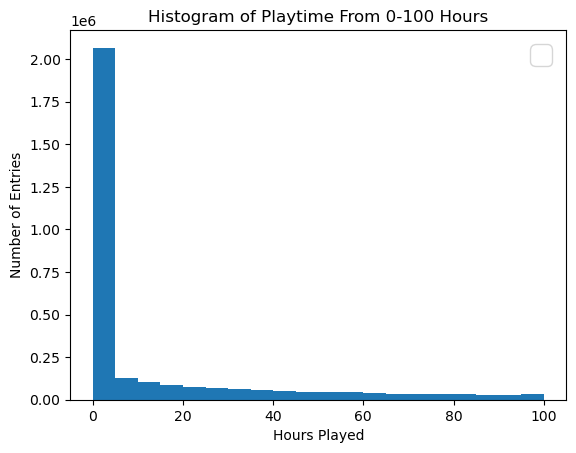

In [113]:
colors = ['green', 'blue', 'lime']
  
plt.hist(zero_to_one_hundred_hours, 20, 
         histtype ='bar',
         )
  
plt.legend(prop ={'size': 20})
  
plt.title('Histogram of Playtime From 0-100 Hours')
plt.xlabel("Hours Played")
plt.ylabel("Number of Entries")
  
plt.show()